# CIFAR-10


https://github.com/geifmany/cifar-vgg

In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [48]:
import numpy as np
import keras
from keras import backend as K
from keras.datasets import cifar10
from time import time

from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import preprocessing

from tqdm import tqdm
from matplotlib import pyplot as plt

In [21]:
import os
import sys
from os.path import join
ROOT = join('/home','qsb','Winter_School_QSB_2018')
sys.path.append(ROOT)
os.chdir(join(ROOT, 'Advanced1'))

In [30]:
from cifar10vgg import cifar10vgg

In [31]:
from sklearn.metrics import make_scorer, balanced_accuracy_score
from scipy.stats import pearsonr

def discrete_variable_score(y_true, y_predicted):    
    return balanced_accuracy_score(y_true, y_predicted)

def continuous_variable_score(y_true, y_predicted):
    return pearsonr(y_true,y_predicted)[0]


def extract_representations(model,samples):
    inp = model.input                                           # input placeholder
    outputs = [layer.output for layer in model.layers]          # all layer outputs
    functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function
    layers_outs = functor([samples, 1.])
    return layers_outs

# create scorer
my_func = make_scorer(discrete_variable_score,greater_is_better=True)

In [4]:
def load_cifar10_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    y_test_int = y_test
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)    
    return x_train, x_test, y_train, y_test, y_test_int

In [5]:
x_train, x_test, y_train, y_test, y_test_int = load_cifar10_data()

NameError: name 'cifar10' is not defined

In [35]:
pwd

'/home/qsb/Winter_School_QSB_2018/Advanced1'

In [2]:
model = cifar10vgg(train=False)
model_untrained = cifar10vgg(train=True)

NameError: name 'cifar10vgg' is not defined

In [37]:
model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_76 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_51 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_77 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 64)        256       
__________

In [38]:
n_samples = 100
samples = x_test[:n_samples,:,:,:]
labels  = y_test[:n_samples,:]
labels_int = y_test_int[:n_samples]
print(samples.shape)
print(labels.shape)

(100, 32, 32, 3)
(100, 10)


In [39]:
tin = time()
predicted_x = model.predict(samples)
print('Elapsed : {}'.format(time() - tin))

Elapsed : 4.797052621841431


In [40]:
residuals = np.argmax(predicted_x,1) != np.argmax(labels,1)
loss = sum(residuals)/len(residuals)
print("the validation 0/1 loss is: ",loss)

the validation 0/1 loss is:  0.05


In [41]:
np.argmax(predicted_x[:10],1)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [42]:
np.argmax(labels[:10],1)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [43]:
layers_outs = extract_representations(model.model, samples)
layers_names = [l.name for l in model.model.layers]

In [44]:
_ = [print(i, name, l.shape) for i, (name, l) in enumerate(zip(layers_names, layers_outs) )]

0 conv2d_66 (100, 32, 32, 64)
1 activation_76 (100, 32, 32, 64)
2 batch_normalization_71 (100, 32, 32, 64)
3 dropout_51 (100, 32, 32, 64)
4 conv2d_67 (100, 32, 32, 64)
5 activation_77 (100, 32, 32, 64)
6 batch_normalization_72 (100, 32, 32, 64)
7 max_pooling2d_26 (100, 16, 16, 64)
8 conv2d_68 (100, 16, 16, 128)
9 activation_78 (100, 16, 16, 128)
10 batch_normalization_73 (100, 16, 16, 128)
11 dropout_52 (100, 16, 16, 128)
12 conv2d_69 (100, 16, 16, 128)
13 activation_79 (100, 16, 16, 128)
14 batch_normalization_74 (100, 16, 16, 128)
15 max_pooling2d_27 (100, 8, 8, 128)
16 conv2d_70 (100, 8, 8, 256)
17 activation_80 (100, 8, 8, 256)
18 batch_normalization_75 (100, 8, 8, 256)
19 dropout_53 (100, 8, 8, 256)
20 conv2d_71 (100, 8, 8, 256)
21 activation_81 (100, 8, 8, 256)
22 batch_normalization_76 (100, 8, 8, 256)
23 dropout_54 (100, 8, 8, 256)
24 conv2d_72 (100, 8, 8, 256)
25 activation_82 (100, 8, 8, 256)
26 batch_normalization_77 (100, 8, 8, 256)
27 max_pooling2d_28 (100, 4, 4, 256)
28 c

In [3]:
model

NameError: name 'model' is not defined

In [45]:
# patiently individuate dropout and pooling layers indexes 
idx = [3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 52, 57, 59]
selected_outs = [(layers_names[i],layers_outs[i]) for i in idx]

# or use a nice list comprehension
selected_outs = [(layers_names[i],layers_outs[i]) for i in range(len(layers_names)) 
                 if 'dropout' in layers_names[i] or 'pool' in layers_names[i]]

selected_layers_labels = [l for (l,_) in selected_outs]

# Decoding

In [46]:
Score = []
Results = []
Parameters = []


Cs = np.power(10., np.arange(-3,3))
#Cs = [0.01]

# define grid of parameters
param_grid = {'C' : Cs}
nresampling = 10
nfolds = 5
nprocs = 1


y = labels_int.ravel()

for (name, representation) in tqdm(selected_outs):
    
    X = np.reshape(representation, (n_samples, -1))
    
    # preprocessing
    #X = preprocessing.scale(X) 
    
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=None)
    
    clf_ = SVC(kernel='linear')
    
    grid_search = GridSearchCV(clf_, param_grid, 
                                scoring=my_func, 
                                cv=nfolds, 
                                n_jobs=nprocs, 
                                refit=True,
                                return_train_score=True)

    grid_search.fit(X_train, y_train)    
    
    
    Score.append(grid_search.best_score_)             
    Results.append(grid_search.cv_results_)
    Parameters.append(grid_search.best_params_['C'])

  0%|          | 0/15 [00:00<?, ?it/s]/home/qsb/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
  7%|▋         | 1/15 [00:55<12:56, 55.45s/it]/home/qsb/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
 13%|█▎        | 2/15 [01:08<09:13, 42.59s/it]/home/qsb/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set

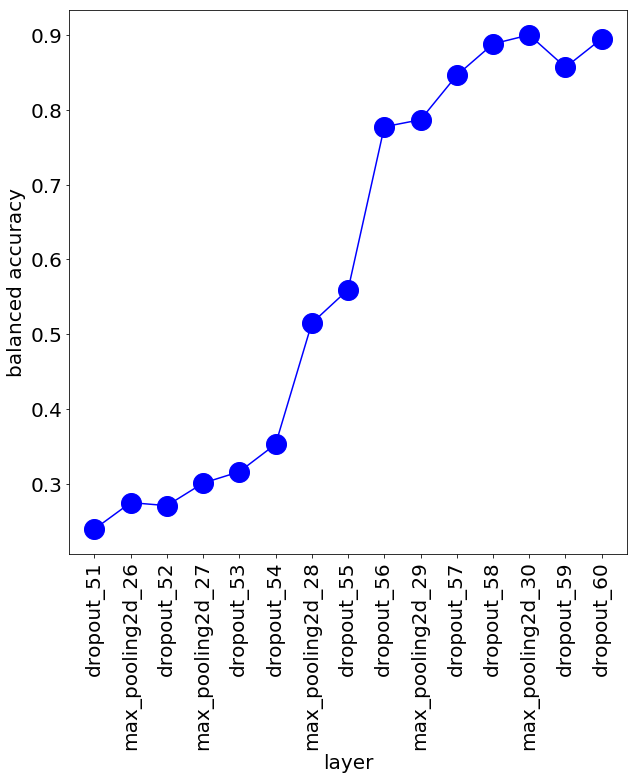

In [49]:
fs = 20
ms = 20

fig = plt.figure(figsize=(10,10))
plt.plot(range(len(selected_outs) ), Score, '-bo',markersize=ms) 
plt.xticks(range(len(selected_outs) ), 
           selected_layers_labels, 
           rotation='vertical',
           fontsize=fs)

plt.yticks(fontsize=fs)
plt.ylabel('balanced accuracy',fontsize=fs)
plt.xlabel('layer',fontsize=fs)
plt.show()